In [164]:
#Zindi Umoja Hack 2022
#19-03-2022
#Attempt1


In [165]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Loading Data
### Attempt1
### 19-03-2022

In [166]:
# Load files
train = pd.read_csv('train.csv')
policies = pd.read_csv('policies.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

train.head(5)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.00000,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00000
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.00000,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24000
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.00000,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50000
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.00000,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67000
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.00000,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64000


In [167]:
train.describe()
# print(train.isnull().count())
#sum insured is okey
#try to create a model using the two values only


def model_test(df_train,df_test):
        
    x,y = df_train[['sum_insured']],df_train[['target']]

    model_1 = LinearRegression()   
    print(x.shape, y.shape)
    model_1.fit(x,y)
    x_test = df_test[['sum_insured']]
    y_predicted = model_1.predict(x_test)

    claim_id = df_test[['claim_id']].values
    to_submit = pd.DataFrame(claim_id, columns=['claim_id'])
    to_submit['target'] = y_predicted
    # convert to submission_file
    to_submit.head()
    to_submit.to_csv('sub2.csv',index=False)
    
    print("MODEL CREATED SUBMIT THE FILE")
    return None



In [168]:
claim_id = test[['claim_id']].values
to_submit = pd.DataFrame(claim_id, columns=['claim_id'])
to_submit['target'] = y_predicted
# convert to submission_file
to_submit.head()
to_submit.to_csv('sub2.csv',index=False)


#Got a MeanAbsoluteError of 67769.85

Now for serious working with the values.
After all the preprocessing steps.

In [169]:
#MISSING VALUES AND DUPLICATES.
print(
     "Train {} \nTest {} \nPolicies{}".format(
train.isnull().sum().any(),
test.isnull().sum().any(),
policies.isnull().sum().any())
)


Train True 
Test True 
PoliciesTrue


In [170]:
#DATA CLEANING

OLD DATA SHAPE
Train: (9376, 15)  Test: (4019, 14) Policy: (30371, 10)
NEW DATA SHAPE
Train: (9290, 15)  Test: (4019, 14) Policy: (30325, 10)


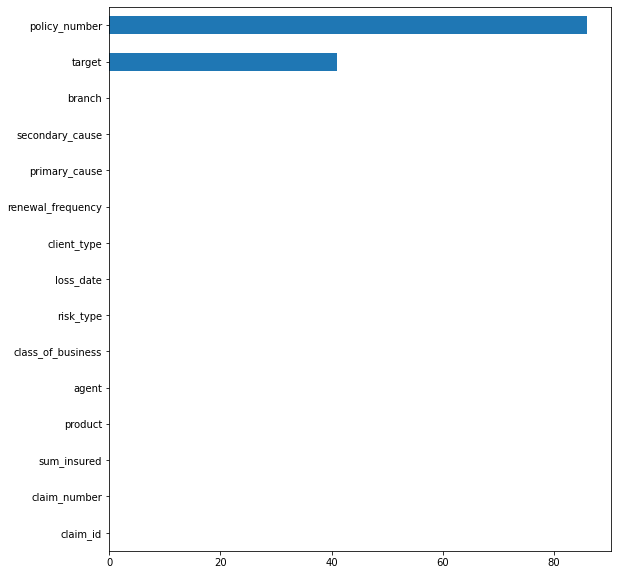

In [171]:
#FILLING MISSING VALUES WITH MODE, MEAN, MEDIAN
# PLOT MISSING VALUES IN TRAIN SET

ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
ax_test = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
ax_policy = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))

# plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
# for p in ax.patches:
#     percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
#     width, height =p.get_width(),p.get_height()
#     x=p.get_x()+width+0.02
#     y=p.get_y()+height/2
#     ax.annotate(percentage,(x,y))

#SINCE POLICY NUMBER IS CATEGORICAL AND UNIQUE
#DROP MISSING VALUES.STATISTICALLY SPEAKING 1% shld WORK.
# WE PROCEED WITH CAUTION TO TRY WITH POLICY DATA.

train_drop = train.dropna(axis=0, how='any')
# test_drop = test.dropna(axis=0, how='any')


test_drop = test #changed *** here

policy_drop = policies.dropna(axis=0, how='any')

#OLD DATA SHAPE
print("OLD DATA SHAPE")
print('Train: {}  Test: {} Policy: {}'.format(train.shape,test.shape,policies.shape))

#GET NEW DATA SHAPE 
# train_drop.describe()
print("NEW DATA SHAPE")
print('Train: {}  Test: {} Policy: {}'.format(train_drop.shape,test_drop.shape,policy_drop.shape))


#AT THE MOMENT 'IM GONNA WORK WITH THE NEW DROPPED VALUES.

In [172]:
#CONVERT DATE AND CATEGORICAL DATA TO RELEVANT FORMAT
#BOTH TRAIN AND TEST.

# train_drop.info()

train_drop.loss_date= pd.to_datetime(train.loss_date, errors='coerce')
test_drop.loss_date = pd.to_datetime(train.loss_date, errors='coerce')

cat_cols = train_drop.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()
cat_cols = test_drop.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()


for col in cat_cols:
  train_drop[col] = train_drop[col].astype('category')

for col in cat_cols:
  test_drop[col] = test_drop[col].astype('category')

# train_drop.info()
# test_drop.info()
#WE ARE NOW GOOD.
#WE DID NOT CLEAN POLICY DATA
#RESERVED FOR LATER.

In [173]:
# policy_drop.info()
date = ['trans_date','from_date','to_date']
cat = policy_drop.columns.difference(['trans_date',
 'from_date', 'to_date']).tolist()

for date in date:
    policy_drop[date] = pd.to_datetime(policy_drop[date], errors='coerce')
    # print("Done")

for cat in cat:
    policy_drop[cat] = policy_drop[cat].astype('category')
    # print("Done")

policy_drop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30325 entries, 0 to 30370
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   policy_number      30325 non-null  category      
 1   product_code       30325 non-null  category      
 2   trans_date         30325 non-null  datetime64[ns]
 3   from_date          30325 non-null  datetime64[ns]
 4   to_date            30325 non-null  datetime64[ns]
 5   agent              30325 non-null  category      
 6   class_of_business  30325 non-null  category      
 7   client_type        30325 non-null  category      
 8   renewal_frequency  30325 non-null  category      
 9   branch             30325 non-null  category      
dtypes: category(7), datetime64[ns](3)
memory usage: 1.4 MB


In [174]:
#NOW THAT CLEANING IS DONE.
# WE PROCEED TRY OUR MODEL ON THE CLEAN SET.
model_test(train_drop, test_drop)


(9290, 1) (9290, 1)
MODEL CREATED SUBMIT THE FILE


In [175]:
#THE ABOVE DOES NOT WORK
#WE HAVE MISSING ENTRIES.
# DROPPING WAS A BAD IDEA.
# ANNOYED :-)

In [176]:
#NOW THAT CLEANING IS DONE.
#we let test dataset to be the way it is untouched.
# WE PROCEED TRY OUR MODEL ON THE CLEAN SET.
model_test(train_drop, test_drop)

#works but accuracy not that pleasing.
#realised ran the code without cleaning test
#now this run incorp test cleaned.
# 67999.90061551571


(9290, 1) (9290, 1)
MODEL CREATED SUBMIT THE FILE


In [177]:
test_drop.info()
#SEE THE CATEGORY HAS NOW CHANGED. WHICH IS PROMISING.
#LETS CHECK WHAT IT GIVES.
#No difference.
#we proceed with the rest.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           4019 non-null   object        
 1   policy_number      3978 non-null   category      
 2   claim_number       4019 non-null   category      
 3   sum_insured        4019 non-null   float64       
 4   product            4019 non-null   category      
 5   agent              4019 non-null   category      
 6   class_of_business  4019 non-null   category      
 7   risk_type          4019 non-null   category      
 8   loss_date          4019 non-null   datetime64[ns]
 9   client_type        4019 non-null   category      
 10  renewal_frequency  4019 non-null   category      
 11  primary_cause      4019 non-null   category      
 12  secondary_cause    4019 non-null   category      
 13  branch             4019 non-null   category      
dtypes: categ

In [178]:
#ADD MONTH DAY AND LOSS YEAR AS CATEGORICAL DATA FOR
# BOTH TRAIN AND TEST DATASET.
train_drop['loss_date_month'] = train_drop.loss_date.dt.month
train_drop['loss_date_year'] = train_drop.loss_date.dt.year

test_drop['loss_date_month'] = test_drop.loss_date.dt.month
test_drop['loss_date_year'] = test_drop.loss_date.dt.year

train_drop.head()
test_drop.head()




,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.00000,prod00005,ag00068,cob00009,rt00032,2021-05-13,ct0003,rf0001,pc0007,sc00029,br00004,5,2021
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.00000,prod00015,ag00064,cob00034,rt00023,2018-05-13,ct0001,rf0003,pc0007,sc00022,br00002,5,2018
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.00000,prod00012,ag00021,cob00016,rt00015,2018-08-18,ct0001,rf0001,pc0011,sc00049,br00001,8,2018
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.00000,prod00002,ag00037,cob00002,rt00002,2018-12-20,ct0001,rf0002,pc0002,sc00012,br00005,12,2018
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.00000,prod00015,ag00037,cob00034,rt00023,2018-11-07,ct0001,rf0003,pc0007,sc00022,br00002,11,2018


In [179]:
train_drop.describe(include='all')

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_month,loss_date_year
count,9290,9290,9290,9290.00000,9290,9290,9290,9290,9290,9290,9290,9290,9290,9290,9290.00000,9290.00000,9290.00000
unique,9290,4076,9084,NaN,37,8,37,50,1359,3,5,21,74,11,NaN,NaN,NaN
top,ID_JZ7QWRHH57RO,pol000006026,claim0000310,NaN,prod00015,ag00037,cob00034,rt00023,2019-08-20 00:00:00,ct0001,rf0002,pc0007,sc00023,br00002,NaN,NaN,NaN
freq,1,254,3,NaN,4411,3101,3608,3771,82,6083,4832,7310,2951,3883,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8613670.86665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41799.56271,6.26480,2018.92831
std,NaN,NaN,NaN,113073325.63396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209357.99498,3.36271,1.04482
min,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.00000,2018.00000
25%,NaN,NaN,NaN,6500.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.78500,3.00000,2018.00000


In [180]:
#ONE HOT ENCODING THE VARAIBLES.

for col in cat_cols:
    le = LabelEncoder()
    train_drop[col] = le.fit_transform(train_drop[col])
    test_drop[col] = le.fit_transform(test_drop[col])

train_drop.head()
test_drop.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,739,1667,300000.00000,4,4,8,29,2021-05-13,2,0,6,26,3,5,2021
1,ID_GTE9ZUJ9GZ97,312,883,2700000.00000,12,3,28,20,2018-05-13,0,2,6,20,1,5,2018
2,ID_RUVIYRKWZ4RG,917,1895,4071352.00000,10,0,14,14,2018-08-18,0,0,9,43,0,8,2018
3,ID_J81X8SWU6JYN,2081,3852,0.00000,1,1,1,1,2018-12-20,0,1,1,10,4,12,2018
4,ID_94NM3JJAWWOQ,257,507,1607178.00000,12,1,28,20,2018-11-07,0,2,6,20,1,11,2018


In [181]:
#NOW TRAIN TEST SPLIT.
#THIS CODE IS CLEVER...

main_cols = train.columns.difference(['claim_id', 'loss_date', 'target']).tolist()
X = train_drop[main_cols]
y = train_drop.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=98)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 61048.635309202255


In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9290 entries, 0 to 9375
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agent              9290 non-null   int32  
 1   branch             9290 non-null   int32  
 2   claim_number       9290 non-null   int32  
 3   class_of_business  9290 non-null   int32  
 4   client_type        9290 non-null   int32  
 5   policy_number      9290 non-null   int32  
 6   primary_cause      9290 non-null   int32  
 7   product            9290 non-null   int32  
 8   renewal_frequency  9290 non-null   int32  
 9   risk_type          9290 non-null   int32  
 10  secondary_cause    9290 non-null   int32  
 11  sum_insured        9290 non-null   float64
dtypes: float64(1), int32(11)
memory usage: 544.3 KB


In [182]:
def make_file():
    #make predictions using test set.
    test_df = test_drop[main_cols]
    predictions = model.predict(test_df)
    #ALSO CLEVER CODE
    # Create a submission file
    sub_file = samplesubmission.copy()
    sub_file.target = predictions
    sub_file.head()
    sub_file.to_csv("sub5.csv", index=False)
    print("File created submit!!")
    



In [183]:
#MAE of test is 74738.65

<AxesSubplot:>

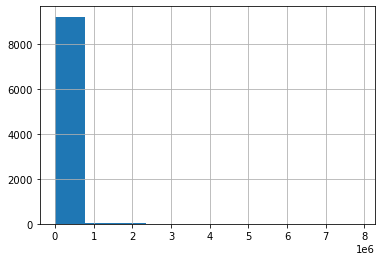

In [184]:
#VISUALIZE NUMERICAL VALUES DISTRIBUTION.
#SEE THAT THIS STEP IS ESSENTIAL.

train_drop['target'].hist()

In [185]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(f'Ridge MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
#iterate
make_file()

Ridge MAE score on the X_test is: 61047.9939093207
Training set score: 0.02
Test set score: 0.04
File created submit!!


In [186]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(f'Lasso MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Lasso MAE score on the X_test is: 61048.26842936286
Training set score: 0.02
Test set score: 0.04
Number of features used: 12


In [188]:
#CHANGED STRATEGY NOW ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
# for col in cat_cols:
#     ohe = OneHotEncoder()
#     train_drop[col] = ohe.fit_transform(train_drop[col])
#     test_drop[col] = ohe.fit_transform(test_drop[col])

train_drop.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_month,loss_date_year
0,ID_JZ7QWRHH57RO,3070,7371,300000.00000,26,4,30,5,2021-05-13,2,0,6,20,5,82150.00000,5,2021
1,ID_KQ5TJMVLJ4EP,1126,3453,16000.00000,4,7,9,31,2018-05-13,2,0,6,21,1,3780.24000,5,2018
2,ID_NYHI7WJGGIAE,630,2783,3000.00000,28,1,9,25,2018-08-18,2,0,6,22,1,2196.50000,8,2018
3,ID_ROMMDCXYUXN5,2546,6384,6000.00000,4,1,8,31,2018-12-20,2,0,6,19,0,105.67000,12,2018
4,ID_2OTD9NX8L73D,1767,4778,26850.00000,14,7,32,22,2018-11-07,0,0,6,19,0,1605.64000,11,2018


In [191]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9290 entries, 0 to 9375
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agent              9290 non-null   int32  
 1   branch             9290 non-null   int32  
 2   claim_number       9290 non-null   int32  
 3   class_of_business  9290 non-null   int32  
 4   client_type        9290 non-null   int32  
 5   policy_number      9290 non-null   int32  
 6   primary_cause      9290 non-null   int32  
 7   product            9290 non-null   int32  
 8   renewal_frequency  9290 non-null   int32  
 9   risk_type          9290 non-null   int32  
 10  secondary_cause    9290 non-null   int32  
 11  sum_insured        9290 non-null   float64
dtypes: float64(1), int32(11)
memory usage: 544.3 KB


In [ ]:
#NOW TRAIN TEST SPLIT.
#THIS CODE IS CLEVER...

main_cols = train.columns.difference(['claim_id', 'loss_date', 'target']).tolist()
X = train_drop[main_cols]
y = train_drop.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=98)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#STANDARDIZE X_TRAIN
std = StandardScaler()
std_x = std.fit_transform(X_train)

std_x.shape



(6503, 12)